In [8]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [14]:
import sqlite3
conn = sqlite3.connect('../db.sqlite3')
query = """
SELECT 
    restaurant_order.id AS id,
    restaurant_order.datetime AS datetime,
    restaurant_orderitem.id AS orderitem_id,
    restaurant_orderitem.quantity AS quantity,
    restaurant_product.id AS product_id,
    restaurant_product.name AS name,
    restaurant_product.price AS price,
    (restaurant_orderitem.quantity * restaurant_product.price) AS total_price
FROM 
    restaurant_order
JOIN 
    restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;

"""

product = pd.read_sql_query(query, conn)
product.to_csv('order_details.csv', index=False)
conn.close()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

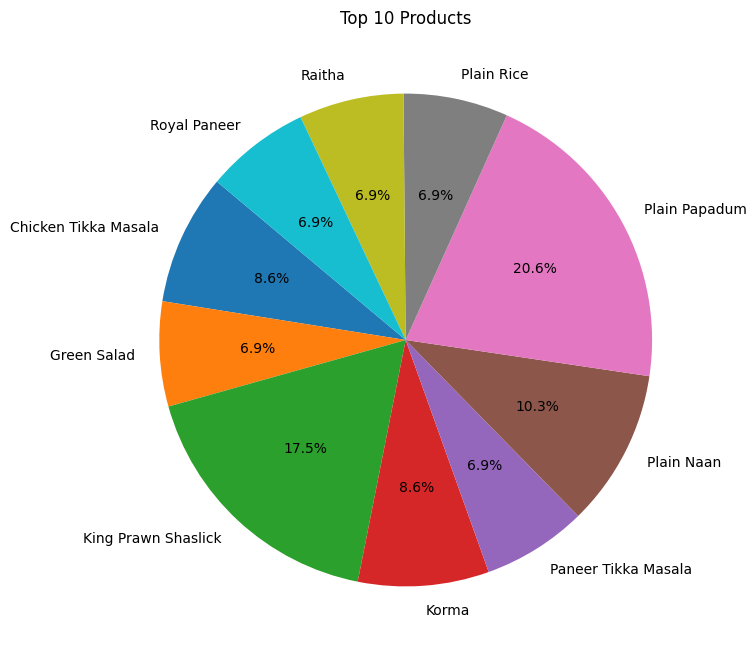

In [17]:
import matplotlib.pyplot as plt
pop = product.sort_values(by="quantity", ascending=False).head(11)
res = pop.groupby('name')['quantity'].sum()
proc = (res / res.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(proc, labels=res.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Products")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

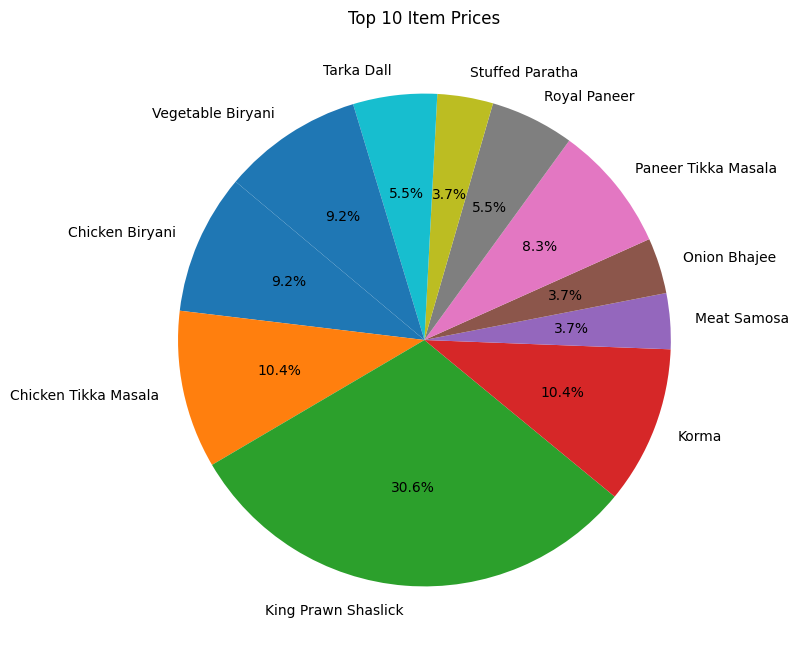

In [18]:
product["item_price"] = product["price"] * product["quantity"]
pop = product.sort_values(by="item_price", ascending=False).head(11)
res = pop.groupby('name')['item_price'].sum()
proc = (res / res.sum()) * 100


plt.figure(figsize=(8, 8))
plt.pie(proc, labels=res.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Item Prices")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

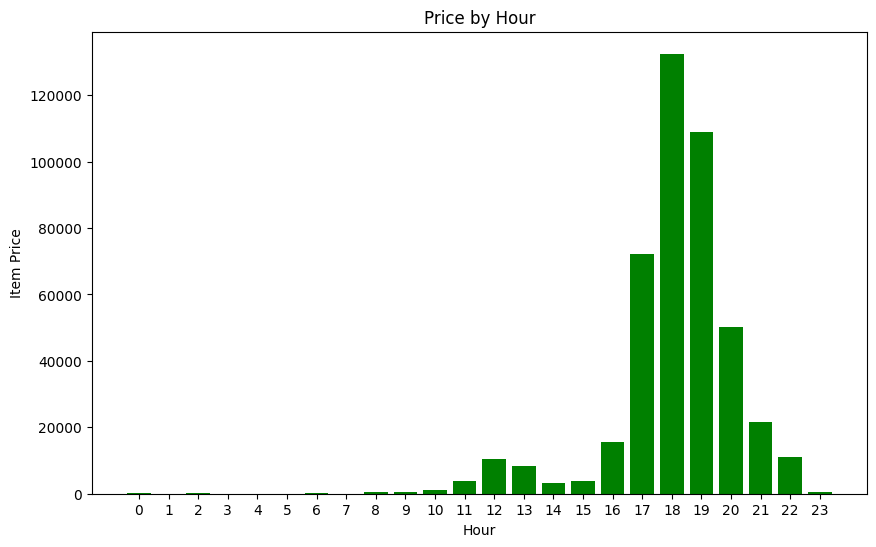

In [20]:
product["datetime"] = pd.to_datetime(product['datetime'])
product['order_hour'] = product['datetime'].dt.hour
res = product.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(10, 6))
plt.bar(res.index, res.values, color='green')
plt.xlabel("Hour")
plt.ylabel("Item Price")
plt.title("Price by Hour")
plt.xticks(range(0, 24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

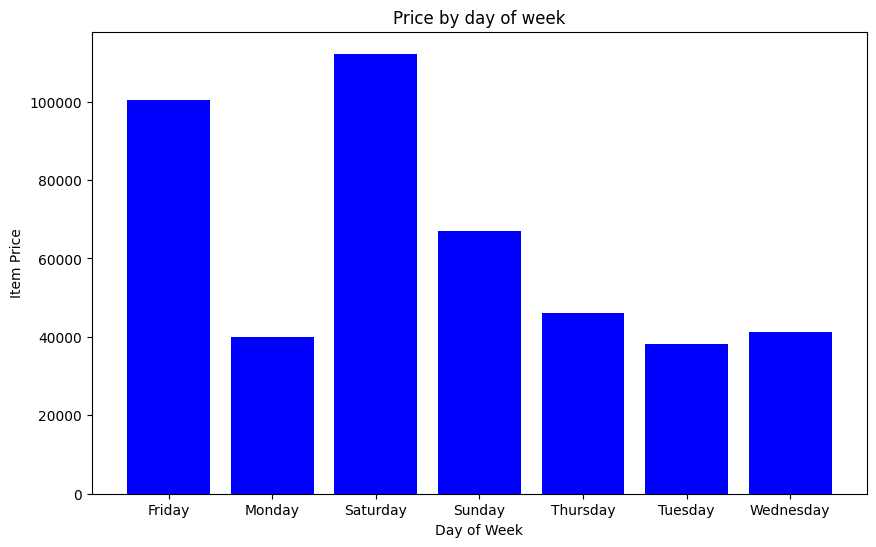

In [21]:
product["datetime"] = pd.to_datetime(product['datetime'])
product['order_day_of_week'] = product['datetime'].dt.dayofweek
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
product['order_day_of_week'] = product['order_day_of_week'].map(day)
res = product.groupby('order_day_of_week')['item_price'].sum()

plt.figure(figsize=(10, 6))
plt.bar(res.index, res.values, color='blue')
plt.xlabel("Day of Week")
plt.ylabel("Item Price")
plt.title("Price by day of week")
plt.show()